In [ ]:
!pip install pandas -q
!pip install moexalgo -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00


# загрузка и настройка библиотек

In [ ]:
import pandas as pd
from moexalgo import Ticker


import pprint
pd.set_option("display.max_columns", 50)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

fields_path = "https://drive.google.com/uc?export=download&id=13wf9SPj8se8qKDtW9-Ud94gzfry11mc-"


In [ ]:
sec_fields = pd.read_csv(fields_path)
sec_fields.columns = [col.lower() for col in sec_fields.columns]
sec_fields.head()

,trade_code,bigfield
0,ABIO,Потребсектор
1,AFLT,транспорт
2,AGRO,Потребсектор
3,AKRN,Химпром
4,ALRS,Металлы и добыча


In [ ]:
# sec_fields.groupby('bigfield').groups.items()

In [ ]:
trade_stats = pd.DataFrame(Ticker('AFLT').tradestats(date='2022-11-01', till_date='2023-12-31'))

In [ ]:
trade_stats['tradedate'].min(), trade_stats['tradedate'].max()

(datetime.date(2022, 11, 1), datetime.date(2023, 10, 12))

In [ ]:
trade_stats.head()

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,trades,pr_vwap,pr_change,trades_b,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,systime
0,AFLT,2022-11-01,10:05:00,25.52,25.62,25.50,25.56,0.0008,12278,3138070.0,205,25.56,0.1567,115,90,850029.0,2288040.0,3323,8955,-0.46,25.58,25.55,2023-10-27 01:59:59
1,AFLT,2022-11-01,10:10:00,25.54,25.56,25.52,25.54,0.0005,2314,590916.0,60,25.54,0.0000,33,27,297036.0,293880.0,1163,1151,0.01,25.54,25.53,2023-10-27 02:00:00
2,AFLT,2022-11-01,10:15:00,25.52,25.54,25.52,25.54,0.0005,1315,335642.0,61,25.52,0.0784,33,28,69979.0,265663.0,274,1041,-0.58,25.54,25.52,2023-10-27 02:00:01
3,AFLT,2022-11-01,10:20:00,25.52,25.54,25.48,25.50,0.0005,9408,2399333.0,128,25.50,-0.0784,50,78,953091.0,1446241.0,3736,5672,-0.21,25.51,25.50,2023-10-27 02:00:01
4,AFLT,2022-11-01,10:25:00,25.50,25.64,25.48,25.62,0.0004,15693,4015215.0,155,25.59,0.4706,113,42,3445724.0,569491.0,13465,2228,0.72,25.59,25.56,2023-10-27 02:00:02


In [ ]:
fields = pd.read_csv(fields_path)
field_names = fields['TRADE_CODE'].unique().tolist()
# field_names

In [ ]:
def get_tradestats(fields_path, start_date='2022-06-01', end_date='2023-12-31', round_digits=4):
  fields = pd.read_csv(fields_path)
  field_names = fields['TRADE_CODE'].unique().tolist()
  trade_stats = pd.DataFrame()
  print(len(field_names))
  for field_name in field_names:
    print(f'field_name={field_name}')
    trade_stats_temp = pd.DataFrame(Ticker(field_name).tradestats(date=start_date, till_date=end_date))
    trade_stats_gr_temp = trade_stats_temp.groupby(['tradedate','ticker'], as_index=False).agg({'val_b':'sum',
                                                                          'val_s':'sum',
                                                                          'vol_b':'sum',
                                                                          'vol_s':'sum',
                                                                          'pr_vwap_b':'mean',
                                                                          'pr_vwap_s':'mean',
                                                                          'pr_vwap':['mean', 'median', 'var'],
                                                                          'pr_open':['mean', 'median', 'var'],})
    trade_stats_gr_temp.columns = ['tradedate','ticker',
                                      'val_b', 'val_s', 'vol_b','vol_s',
                                      'pr_vwap_b_mean', 'pr_vwap_s_mean',
                                      'pr_vwap_mean', 'pr_vwap_median', 'pr_vwap_var',
                                      'pr_open_mean', 'pr_open_median', 'pr_open_var',
                                      ]



    trade_stats = pd.concat([trade_stats, trade_stats_gr_temp])

  return trade_stats



In [ ]:
df = get_tradestats(fields_path)


96
field_name=ABIO
field_name=AFLT
field_name=AGRO
field_name=AKRN
field_name=ALRS
field_name=APTK
field_name=AQUA
field_name=BANEP
field_name=BELU
field_name=BSPB
field_name=CBOM
field_name=CHMF
field_name=CIAN
field_name=DVEC
field_name=ELFV
field_name=ENPG
field_name=ETLN
field_name=FEES
field_name=FESH
field_name=FIVE
field_name=FIXP
field_name=FLOT
field_name=GAZP
field_name=GEMC
field_name=GLTR
field_name=GMKN
field_name=HHRU
field_name=HYDR
field_name=IRAO
field_name=KAZT
field_name=KZOS
field_name=KZOSP
field_name=LENT
field_name=LKOH
field_name=LSNGP
field_name=LSRG
field_name=MAGN
field_name=MDMG
field_name=MGNT
field_name=MGTSP
field_name=MOEX
field_name=MRKC
field_name=MRKP
field_name=MRKU
field_name=MRKV
field_name=MRKZ
field_name=MSNG
field_name=MSRS
field_name=MTLR
field_name=MTLRP
field_name=MTSS
field_name=MVID
field_name=NKHP
field_name=NKNC
field_name=NKNCP
field_name=NLMK
field_name=NMTP
field_name=NVTK
field_name=OGKB
field_name=OKEY
field_name=OZON
field_name=PHOR

In [ ]:
df = sec_fields.merge(df, left_on='trade_code', right_on='ticker')

In [ ]:
df.to_csv('tradestats_2.csv')

In [ ]:
df.shape

(24258, 16)

In [ ]:
df.head()

,trade_code,bigfield,tradedate,ticker,val_b,val_s,vol_b,vol_s,pr_vwap_b_mean,pr_vwap_s_mean,pr_vwap_mean,pr_vwap_median,pr_vwap_var,pr_open_mean,pr_open_median,pr_open_var
0,ABIO,Потребсектор,2023-08-17,ABIO,18969613.0,22262787.0,17184,20217,110.434600,110.344000,110.396827,110.390,0.362812,110.410000,110.43,0.346462
1,ABIO,Потребсектор,2023-08-18,ABIO,19337922.0,20074354.0,17530,18349,110.053462,109.773600,109.886538,109.960,0.547819,109.926346,110.04,0.545190
2,ABIO,Потребсектор,2023-08-21,ABIO,56934997.0,33126019.0,50055,29227,113.537500,113.328713,113.446058,113.700,0.604403,113.424231,113.71,0.651415
3,ABIO,Потребсектор,2023-08-22,ABIO,14918893.0,22172397.0,13118,19553,113.528431,113.385657,113.441731,113.365,0.121636,113.462885,113.40,0.107630
4,ABIO,Потребсектор,2023-08-23,ABIO,46034597.0,38291367.0,40483,33801,113.610288,113.503663,113.550481,113.695,0.659040,113.560769,113.67,0.656062


- по отрасли понять, что тренд на рост уже неделю (гиперпараметр) и он тот же тренд будет продолжаться.
- выбираем акции, у которых тренд в другую сторону - это кандидаты на продажу или покупку

```

'tradedate',
'tradetime',
'secid', код инструмента
'pr_open', цена открытия
'pr_high', максимальная цена за период
'pr_low', минимальная цена за период
'pr_close', последняя цена за период
'pr_std', стандартное отклонение цены
'vol', объем в лотах
'val', объем в рублях
'trades', кол-во сделок
'pr_vwap', средневзвешенная цена
'pr_change',изменение цены за период, %
'trades_b', кол-во сделок на покупку
'trades_s', кол-во сделок на продажу
'val_b', объем покупок в руб
'val_s', объем продаж в руб
'vol_b', объем покупок в лотах
'vol_s', объем продаж в лотах
'disb', соотношение объема покупок и продаж
'pr_vwap_b', средневзвешенная цена покупки
'pr_vwap_s', средневзвешенная цена продажи
'SYSTIME'
Class    Metrics    Des (все метрики считаются за период 5 мин)

```

In [ ]:
df_gr = df.groupby(['tradedate','ticker'],
                  as_index=False).agg({'val_b':'sum',
                                    'val_s':'sum',
                                    'vol_b':'sum',
                                    'vol_s':'sum',
                                    'pr_vwap_b':'mean',
                                    'pr_vwap_s':'mean',
                                    'pr_vwap':['mean', 'median', 'var'],
                                    'pr_open':['mean', 'median', 'var'],

                                    })
df_gr.columns = ['tradedate','ticker',
                 'val_b', 'val_s', 'vol_b','vol_s',
                 'pr_vwap_b_mean', 'pr_vwap_s_mean',
                 'pr_vwap_mean', 'pr_vwap_median', 'pr_vwap_var',
                 'pr_open_mean', 'pr_open_median', 'pr_open_var',
                 ]
df_gr.head()

,tradedate,ticker,val_b,val_s,vol_b,vol_s,pr_vwap_b_mean,pr_vwap_s_mean,pr_vwap_mean,pr_vwap_median,pr_vwap_var,pr_open_mean,pr_open_median,pr_open_var
0,2023-08-17,ABIO,18969613.0,22262787.0,17184,20217,110.434600,110.344000,110.396827,110.390,0.362812,110.410000,110.43,0.346462
1,2023-08-18,ABIO,19337922.0,20074354.0,17530,18349,110.053462,109.773600,109.886538,109.960,0.547819,109.926346,110.04,0.545190
2,2023-08-21,ABIO,56934997.0,33126019.0,50055,29227,113.537500,113.328713,113.446058,113.700,0.604403,113.424231,113.71,0.651415
3,2023-08-22,ABIO,14918893.0,22172397.0,13118,19553,113.528431,113.385657,113.441731,113.365,0.121636,113.462885,113.40,0.107630
4,2023-08-23,ABIO,46034597.0,38291367.0,40483,33801,113.610288,113.503663,113.550481,113.695,0.659040,113.560769,113.67,0.656062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2023-12-04,ABIO,19537823.0,21681904.0,21182,23475,92.245714,92.254894,92.260784,92.250,0.517920,92.310392,92.27,0.647119
76,2023-12-05,ABIO,15586107.0,14068710.0,17579,15881,88.116019,88.114519,88.108654,87.765,0.974517,88.147885,87.78,1.018962
77,2023-12-06,ABIO,8923259.0,7451467.0,10197,8504,87.548778,87.500909,87.510600,87.060,0.704282,87.524200,87.13,0.687380
78,2023-12-07,ABIO,8003959.0,7823248.0,9207,9020,86.848125,86.807732,86.826569,86.780,0.228462,86.848824,86.79,0.237106


In [ ]:
df = pd.DataFrame()
for TRADE_CODE in sec_fields.head(5)['trade_code']:
  df_temp = pd.DataFrame(Ticker(TRADE_CODE).candles(date='2018-11-01', till_date='2023-12-31', period='D'))
  df_temp['trade_code'] = TRADE_CODE
  df = pd.concat([df, df_temp])


In [ ]:
df.columns = [col.lower() for col in df.columns]

In [ ]:
df.shape

(6352, 9)

In [ ]:
df.groupby('trade_code').agg(count=('begin', 'count'))

,count
trade_code,
ABIO,1270
AFLT,1272
AGRO,1268
AKRN,1270
ALRS,1272


In [ ]:
df[df['trade_code'] == 'ABIO'].head(20)

,open,close,high,low,value,volume,begin,end,trade_code
0,7.97,8.42,8.86,7.90,1027778.0,120100.0,2018-11-01,2018-11-01 23:59:59,ABIO
1,8.79,8.21,8.79,8.01,450546.0,55200.0,2018-11-02,2018-11-02 23:59:59,ABIO
2,8.15,8.18,8.18,7.96,242188.0,30000.0,2018-11-06,2018-11-06 23:59:59,ABIO
3,8.17,8.16,8.17,8.05,46825.0,5800.0,2018-11-07,2018-11-07 23:59:59,ABIO
4,8.08,8.17,8.17,8.08,8976.0,1100.0,2018-11-08,2018-11-08 23:59:59,ABIO
5,8.16,8.07,8.16,7.91,281684.0,35300.0,2018-11-09,2018-11-09 23:59:59,ABIO
6,7.95,8.07,8.10,7.94,94659.0,11900.0,2018-11-12,2018-11-12 23:59:59,ABIO
7,8.15,8.10,8.15,7.95,62916.0,7900.0,2018-11-13,2018-11-13 23:59:59,ABIO
8,8.07,8.10,8.10,8.07,20230.0,2500.0,2018-11-14,2018-11-14 23:59:59,ABIO
9,8.17,8.01,8.17,8.00,44901.0,5600.0,2018-11-15,2018-11-15 23:59:59,ABIO


# Преобразование типов

In [ ]:
df['begin'] = pd.to_datetime(df['begin'])
df['end'] = pd.to_datetime(df['end'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6352 entries, 0 to 1271
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   open        6352 non-null   float64       
 1   close       6352 non-null   float64       
 2   high        6352 non-null   float64       
 3   low         6352 non-null   float64       
 4   value       6352 non-null   float64       
 5   volume      6352 non-null   float64       
 6   begin       6352 non-null   datetime64[ns]
 7   end         6352 non-null   datetime64[ns]
 8   trade_code  6352 non-null   object        
dtypes: datetime64[ns](2), float64(6), object(1)
memory usage: 496.2+ KB


> что такое value? что такое volume?

# EDA

In [ ]:
trade_code ='ABIO'
df_chart = df[df['trade_code'] == trade_code]

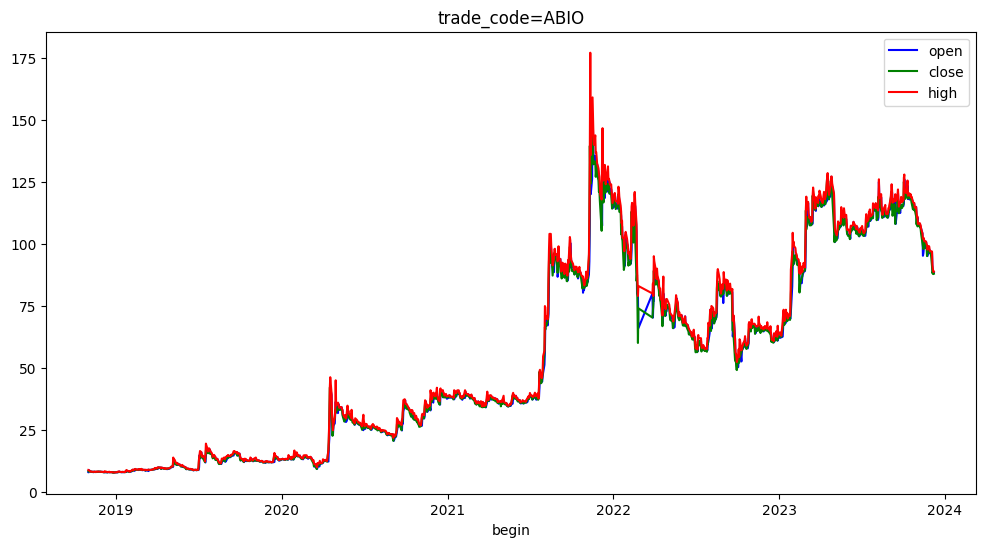

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_chart.begin, df_chart['open'], label='open', color='blue')
plt.plot(df_chart.begin, df_chart['close'], label='close', color='green')
plt.plot(df_chart.begin, df_chart['high'], label='high', color='red')

plt.title(f'trade_code={trade_code}')
plt.xlabel('begin')
# plt.ylabel('Значение')
plt.legend()
plt.show()


In [ ]:
# fig = px.line(df_chart, x='begin', y=['open', 'close', 'high'], title=f'trade_code={trade_code}',
#               )
# fig.show()

# создание новых признаков

 - Если пятая буква P латинская, значит это привилегированные акции, без этой буквы - обыкновенные акции.
 - индустрия бумаги


## лаги в истории

In [ ]:
%%time
df_rolled = pd.DataFrame()
y_rolled = pd.DataFrame()
for trade_code in sec_fields.head(5)['trade_code']:
  print(f'trade_code={trade_code}')
  df_temp = df[df['trade_code'] == trade_code].copy()
  df_rolled_temp, y_rolled_temp = make_forecasting_frame(df_temp['open'],
                                                        kind='begin',
                                                        max_timeshift=1,
                                                        rolling_direction=1)
  df_rolled_temp['trade_code'] = trade_code
  y_rolled_temp = y_rolled_temp.reset_index()
  y_rolled_temp['trade_code'] = trade_code

  df_rolled = pd.concat([df_rolled, df_rolled_temp])
  y_rolled = pd.concat([y_rolled, y_rolled_temp])

trade_code=ABIO


Rolling: 100%|██████████| 1270/1270 [00:04<00:00, 258.52it/s]


trade_code=AFLT


Rolling: 100%|██████████| 1272/1272 [00:04<00:00, 300.87it/s]


trade_code=AGRO


Rolling: 100%|██████████| 1268/1268 [00:04<00:00, 288.30it/s]


trade_code=AKRN


Rolling: 100%|██████████| 1270/1270 [00:03<00:00, 336.78it/s]


trade_code=ALRS


Rolling: 100%|██████████| 1272/1272 [00:03<00:00, 320.98it/s]


CPU times: user 22.2 s, sys: 294 ms, total: 22.5 s
Wall time: 23.7 s


In [ ]:
# df[df['trade_code'] == 'AGRO']

In [ ]:
df_rolled['id_new'] = df_rolled.apply(lambda x:
                                        str(x['id'][0])+'_'+str(x['id'][1])+'_'+x['trade_code'],
                                      axis=1)

In [ ]:
y_rolled['id_new'] = y_rolled.apply(lambda x:
                                        str(x['index'][0])+'_'+str(x['index'][1])+'_'+x['trade_code'],
                                      axis=1)

In [ ]:
df[(df['trade_code'] == 'AGRO')&(df['begin'] >= '2019-01-01')]

,open,close,high,low,value,volume,begin,end,trade_code
42,788.5,800.0,800.0,786.0,4272225.0,5385.0,2019-01-03,2019-01-03 23:59:59,AGRO
43,800.0,778.0,805.0,777.5,11126921.5,14130.0,2019-01-04,2019-01-04 23:59:59,AGRO
44,778.0,767.0,778.0,761.0,4332311.0,5656.0,2019-01-08,2019-01-08 23:59:59,AGRO
45,762.5,782.0,784.5,761.5,9167729.5,11841.0,2019-01-09,2019-01-09 23:59:59,AGRO
46,778.5,774.5,793.0,760.0,10649094.5,13721.0,2019-01-10,2019-01-10 23:59:59,AGRO
...,...,...,...,...,...,...,...,...,...
1263,1410.0,1375.2,1416.8,1362.8,367204019.4,264814.0,2023-12-04,2023-12-04 23:59:59,AGRO
1264,1371.0,1364.2,1394.0,1317.6,508510029.0,376669.0,2023-12-05,2023-12-05 23:59:59,AGRO
1265,1365.0,1351.8,1410.0,1331.0,584874206.0,424206.0,2023-12-06,2023-12-06 23:59:59,AGRO
1266,1347.6,1326.4,1374.4,1305.0,523521030.8,393318.0,2023-12-07,2023-12-07 23:59:59,AGRO


In [ ]:
df_rolled[df_rolled['trade_code'] == 'AGRO']

,id,time,value,kind,trade_code,id_new
1,"(id, 1)",0,665.0,begin,AGRO,id_1_AGRO
3,"(id, 2)",0,665.0,begin,AGRO,id_2_AGRO
4,"(id, 2)",1,664.0,begin,AGRO,id_2_AGRO
6,"(id, 3)",1,664.0,begin,AGRO,id_3_AGRO
7,"(id, 3)",2,671.5,begin,AGRO,id_3_AGRO
...,...,...,...,...,...,...
3793,"(id, 1265)",1264,1371.0,begin,AGRO,id_1265_AGRO
3795,"(id, 1266)",1264,1371.0,begin,AGRO,id_1266_AGRO
3796,"(id, 1266)",1265,1365.0,begin,AGRO,id_1266_AGRO
3798,"(id, 1267)",1265,1365.0,begin,AGRO,id_1267_AGRO


In [ ]:
df_rolled[df_rolled['trade_code'] == 'AGRO'].groupby('id_new', as_index=False).agg({'value':['min', 'max', 'mean']}).sort_values('id_new')

id_new  value              
                      min    max   mean
0     id_1000_AGRO  770.0  773.8  771.9
1     id_1001_AGRO  762.8  770.0  766.4
2     id_1002_AGRO  755.0  762.8  758.9
3     id_1003_AGRO  755.0  759.0  757.0
4     id_1004_AGRO  759.0  772.2  765.6
...            ...    ...    ...    ...
1262   id_997_AGRO  766.0  783.8  774.9
1263   id_998_AGRO  766.0  773.8  769.9
1264   id_999_AGRO  773.8  773.8  773.8
1265    id_99_AGRO  732.0  742.0  737.0
1266     id_9_AGRO  690.0  695.0  692.5

[1267 rows x 4 columns]

In [ ]:
# y_rolled[y_rolled['trade_code'] == 'AGRO']

In [ ]:
settings_minimal = settings.MinimalFCParameters()
settings_minimal

{'sum_values': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variance': None, 'root_mean_square': None, 'maximum': None, 'absolute_maximum': None, 'minimum': None}

In [ ]:
cols = ['id_new', 'time', 'value']

df_features = extract_features(df_rolled[cols],
                               column_id="id_new",
                               column_sort="time",
                               default_fc_parameters=settings_minimal)
df_features

Feature Extraction: 100%|██████████| 6347/6347 [00:05<00:00, 1259.57it/s]


,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum
id_1000_ABIO,132.28,66.140,66.140,2.0,0.900,0.810000,66.146123,67.04,67.04,65.24
id_1000_AFLT,51.46,25.730,25.730,2.0,0.070,0.004900,25.730095,25.80,25.80,25.66
id_1000_AGRO,1543.80,771.900,771.900,2.0,1.900,3.610000,771.902338,773.80,773.80,770.00
id_1000_AKRN,34350.00,17175.000,17175.000,2.0,325.000,105625.000000,17178.074688,17500.00,17500.00,16850.00
id_1000_ALRS,137.25,68.625,68.625,2.0,0.025,0.000625,68.625005,68.65,68.65,68.60
...,...,...,...,...,...,...,...,...,...,...
id_9_ABIO,16.22,8.110,8.110,2.0,0.040,0.001600,8.110099,8.15,8.15,8.07
id_9_AFLT,194.96,97.480,97.480,2.0,0.480,0.230400,97.481182,97.96,97.96,97.00
id_9_AGRO,1385.00,692.500,692.500,2.0,2.500,6.250000,692.504513,695.00,695.00,690.00
id_9_AKRN,9230.00,4615.000,4615.000,2.0,19.000,361.000000,4615.039111,4634.00,4634.00,4596.00


In [ ]:
sample = df_features.reset_index().rename(columns={'index':'id_new'})\
                    .merge(y_rolled[['id_new', 'value', 'trade_code']], on='id_new')

In [ ]:
sample.head()

,id_new,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum,value,trade_code
0,id_1000_ABIO,132.28,66.140,66.140,2.0,0.900,0.810000,66.146123,67.04,67.04,65.24,67.10,ABIO
1,id_1000_AFLT,51.46,25.730,25.730,2.0,0.070,0.004900,25.730095,25.80,25.80,25.66,24.72,AFLT
2,id_1000_AGRO,1543.80,771.900,771.900,2.0,1.900,3.610000,771.902338,773.80,773.80,770.00,762.80,AGRO
3,id_1000_AKRN,34350.00,17175.000,17175.000,2.0,325.000,105625.000000,17178.074688,17500.00,17500.00,16850.00,17926.00,AKRN
4,id_1000_ALRS,137.25,68.625,68.625,2.0,0.025,0.000625,68.625005,68.65,68.65,68.60,66.96,ALRS


In [ ]:
sample = sample.merge(sec_fields, on='trade_code')

In [ ]:
sample.shape

(6347, 14)

In [ ]:
df.shape

(6352, 9)

In [ ]:
sample.head()

,id_new,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum,value,trade_code,bigfield
0,id_1000_ABIO,132.28,66.14,66.14,2.0,0.90,0.8100,66.146123,67.04,67.04,65.24,67.10,ABIO,Потребсектор
1,id_1001_ABIO,134.14,67.07,67.07,2.0,0.03,0.0009,67.070007,67.10,67.10,67.04,66.72,ABIO,Потребсектор
2,id_1002_ABIO,133.82,66.91,66.91,2.0,0.19,0.0361,66.910270,67.10,67.10,66.72,65.20,ABIO,Потребсектор
3,id_1003_ABIO,131.92,65.96,65.96,2.0,0.76,0.5776,65.964378,66.72,66.72,65.20,65.44,ABIO,Потребсектор
4,id_1004_ABIO,130.64,65.32,65.32,2.0,0.12,0.0144,65.320110,65.44,65.44,65.20,65.78,ABIO,Потребсектор


In [ ]:
sample.describe(include='all')

,id_new,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum,value,trade_code,bigfield
count,6347,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347,6347
unique,6347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4
top,id_1000_ABIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFLT,Потребсектор
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1271,2536
mean,NaN,4533.780205,2267.315874,2267.315874,1.999212,18.069545,9.286591e+03,2267.597497,2285.385418,2285.385418,2249.246329,2270.847008,NaN,NaN
std,NaN,9682.084294,4841.099292,4841.099292,0.028058,94.665169,2.001145e+05,4841.926587,4885.168729,4885.168729,4798.492907,4848.575061,NaN,NaN
min,NaN,7.970000,7.835000,7.835000,1.000000,0.000000,0.000000e+00,7.835129,7.850000,7.850000,7.790000,7.790000,NaN,NaN
25%,NaN,132.275000,66.145000,66.145000,2.000000,0.247500,6.126250e-02,66.147440,66.540000,66.540000,65.665000,66.100000,NaN,NaN
50%,NaN,207.440000,103.720000,103.720000,2.000000,0.810000,6.561000e-01,103.720193,104.380000,104.380000,103.020000,103.740000,NaN,NaN
75%,NaN,1904.100000,952.050000,952.050000,2.000000,5.400000,2.916000e+01,952.053185,960.000000,960.000000,945.000000,955.700000,NaN,NaN


In [ ]:
sample.isna().mean().sort_values()

id_new                       0.0
value__sum_values            0.0
value__median                0.0
value__mean                  0.0
value__length                0.0
value__standard_deviation    0.0
value__variance              0.0
value__root_mean_square      0.0
value__maximum               0.0
value__absolute_maximum      0.0
value__minimum               0.0
value                        0.0
trade_code                   0.0
bigfield                     0.0
dtype: float64

# Делим на трейн и тест

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sample.drop(columns='value'),
                                                    sample['value'],
                                                    test_size=.7,
                                                    # stratify=sample['trade_code'],
                                                    shuffle = False,
                                                    random_state = 12345)


In [ ]:
X_train.head()

,id_new,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum,trade_code,bigfield
0,id_1000_ABIO,132.28,66.14,66.14,2.0,0.90,0.8100,66.146123,67.04,67.04,65.24,ABIO,Потребсектор
1,id_1001_ABIO,134.14,67.07,67.07,2.0,0.03,0.0009,67.070007,67.10,67.10,67.04,ABIO,Потребсектор
2,id_1002_ABIO,133.82,66.91,66.91,2.0,0.19,0.0361,66.910270,67.10,67.10,66.72,ABIO,Потребсектор
3,id_1003_ABIO,131.92,65.96,65.96,2.0,0.76,0.5776,65.964378,66.72,66.72,65.20,ABIO,Потребсектор
4,id_1004_ABIO,130.64,65.32,65.32,2.0,0.12,0.0144,65.320110,65.44,65.44,65.20,ABIO,Потребсектор


# Обучаем модели

In [ ]:
# Определите категориальные признаки
categorical_features = [ 'bigfield', ]

# Инициализируйте Pool для тренировочных данных
train_pool = Pool(X_train.drop(columns=['id_new', 'trade_code']), label=y_train, cat_features=categorical_features)

# Инициализируйте Pool для тестовых данных
test_pool = Pool(X_test.drop(columns=['id_new', 'trade_code']), label=y_test, cat_features=categorical_features)


In [ ]:
params = {'iterations':500,
          'learning_rate':0.1,
          'depth':5,
          'loss_function':'RMSE',
          'random_seed':42}

In [ ]:
model_cat = CatBoostRegressor(**params)

In [ ]:
_ = model_cat.fit(train_pool, silent=True)

In [ ]:
pred_train = model_cat.predict(train_pool)
pred_test = model_cat.predict(test_pool)

In [ ]:
rmse_train = mean_squared_error(y_train,pred_train, squared=False)
mae_train = mean_absolute_error(y_train,pred_train)

In [ ]:
rmse_test = mean_squared_error(y_test, pred_test, squared=False)
mae_test = mean_absolute_error(y_test,pred_test)

In [ ]:
y_train.mean(), y_test.mean()

(59.382631302521006, 3218.5463493135267)

In [ ]:
rmse_train,rmse_test

(1.834052161440963, 6329.559601348794)

In [ ]:
mae_train,mae_test

(1.1694627733180745, 3107.759627472812)

# Анализ ошибок

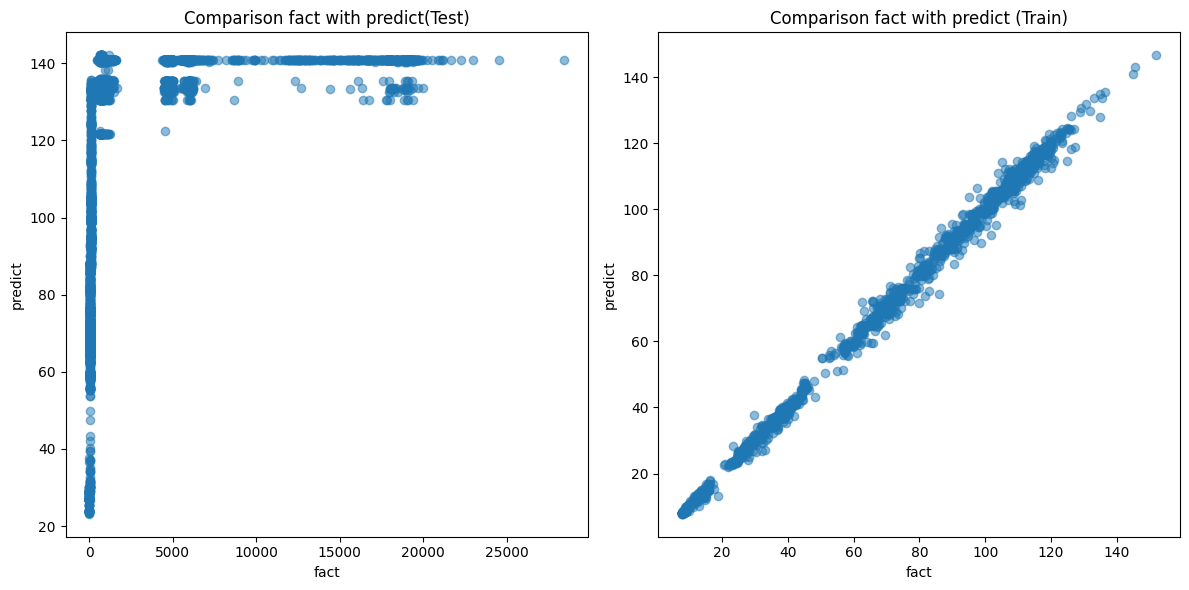

In [ ]:
compare_fact_forecast(y_train, pred_train, y_test, pred_test)

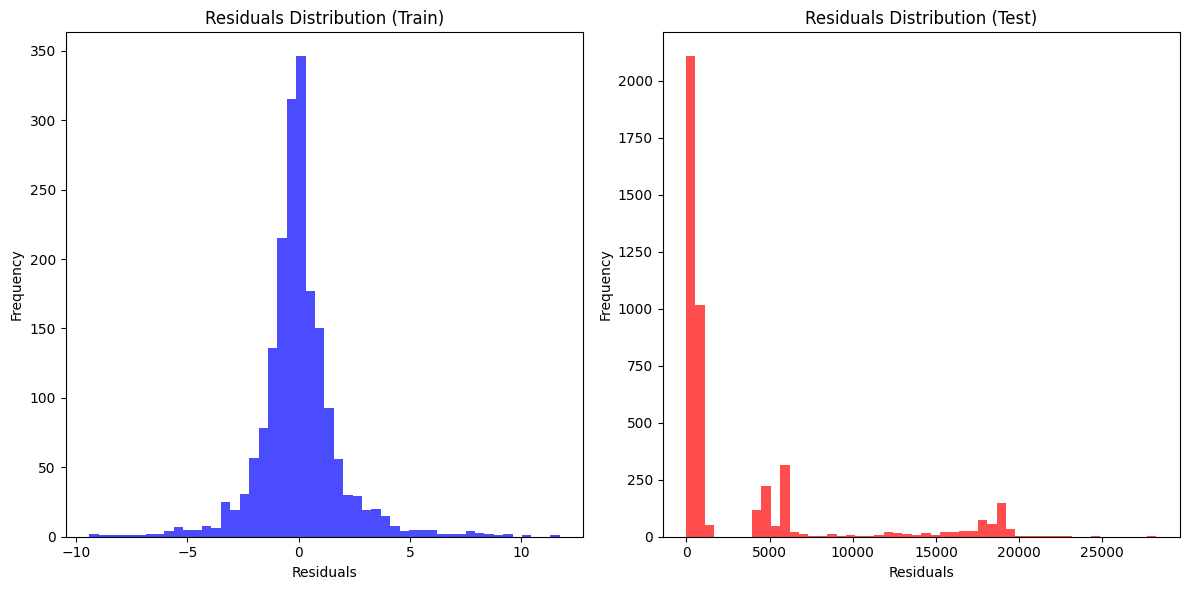

In [ ]:
get_errors_hist(y_train, pred_train, y_test, pred_test)


- проверить, что нет будущего
- прогноз

In [ ]:
# лаг про проскальзывание цены мы не сможем купить по цене закрытия

In [ ]:
# 1 задача - скачать данные - подневные
# список бумаг берем из файла field.csv, добавить короткие бумаги

# Скачивание TradeStats (все акции)

tradestats = pd.DataFrame()
for date in ['2021-01-01', '2021-01-02',]:
    print(date)
    # запрос возвращает не более 1000 записей, чтобы получить все записи используем курсор
    for cursor in range(25):
        url = f'https://iss.moex.com/iss/datashop/algopack/eq/tradestats.csv?date={date}&start={cursor*1000}&iss.only=data'
        df = pd.read_csv(url, sep=';', skiprows=2)
        tradestats = pd.concat([tradestats, df])
        if df.shape[0] < 1000:
            break
        time.sleep(0.5) # приостанавливает работу потока на нужнок количество времени

# tradestats.to_csv('tradestats.csv', index=None)

2021-01-01
2021-01-02


In [ ]:
tradestats

,tradedate,tradetime,secid,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,trades,pr_vwap,pr_change,trades_b,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,SYSTIME


**2 задача скачать небольшой датасет - провести EDA и создать новые признаки** - Владимир

добавить отрасль и придумать разные признаки относительно отрасли (????) - Маша

Придумываем признаки Маша П, Маша В, Наташа , Владимир

и придумываем таргет Маша П, Маша В, Наташа , Владимир

'''

    'tradedate',
    'tradetime',
    'secid', код инструмента
    'pr_open', цена открытия
    'pr_high', максимальная цена за период
    'pr_low', минимальная цена за период
    'pr_close', последняя цена за период
    'pr_std', стандартное отклонение цены
    'vol', объем в лотах
    'val', объем в рублях
    'trades', кол-во сделок
    'pr_vwap', средневзвешенная цена
    'pr_change',изменение цены за период, %
    'trades_b', кол-во сделок на покупку
    'trades_s', кол-во сделок на продажу
    'val_b', объем покупок в руб
    'val_s', объем продаж в руб
    'vol_b', объем покупок в лотах
    'vol_s', объем продаж в лотах
    'disb', соотношение объема покупок и продаж
    'pr_vwap_b', средневзвешенная цена покупки
    'pr_vwap_s', средневзвешенная цена продажи
    'SYSTIME'
    Class	Metrics	Des (все метрики считаются за период 5 мин)

'''

In [ ]:
# задача 3 создание выборки с таргетом (будущая стоимость)

In [ ]:
# - надо продумать как мы будем бектестировать


# - стратегия на покупку/продажа
#   - мы каждый день строим прогнозы
#   - если тренд на рост - покупаем или держим
#   - если убывание - то продаем